In [5]:
import numpy as np
import pandas as pd

# Loading data

In [6]:
vehicles = pd.read_csv("Data/vehiculos_procesado.csv")

In [7]:
vehicles.shape

(35539, 13)

In [8]:
vehicles.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,consumo_std,desplazamiento_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-0.613385
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-0.613385
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,0.372783


In [9]:
n_records = len(vehicles)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehicles)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0 | float64
cilindros | 0.0 | float64
transmision | 0.0 | object
traccion | 0.02093474774191733 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64
consumo_std | 0.0 | float64
desplazamiento_std | 0.0 | float64


In [10]:
vehicles_no_null = vehicles.dropna()

In [11]:
valores_inexistentes_col(vehicles_no_null)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0 | float64
cilindros | 0.0 | float64
transmision | 0.0 | object
traccion | 0.0 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64
consumo_std | 0.0 | float64
desplazamiento_std | 0.0 | float64


# Independent variables and dependent variable

In [12]:
vehicles_no_null['clase'].value_counts()

Compact Cars                          5005
Subcompact Cars                       4154
Midsize Cars                          3913
Standard Pickup Trucks                2098
Sport Utility Vehicle - 4WD           2074
Large Cars                            1772
Two Seaters                           1631
Sport Utility Vehicle - 2WD           1613
Small Station Wagons                  1345
Special Purpose Vehicles              1323
Minicompact Cars                      1184
Standard Pickup Trucks 2WD            1116
Vans                                  1030
Standard Pickup Trucks 4WD             935
Midsize-Large Station Wagons           591
Small Sport Utility Vehicle 4WD        564
Special Purpose Vehicle 2WD            555
Small Pickup Trucks                    509
Standard Sport Utility Vehicle 4WD     434
Small Sport Utility Vehicle 2WD        417
Vans, Cargo Type                       415
Midsize Station Wagons                 412
Small Pickup Trucks 2WD                405
Minivan - 2

In [13]:
y = "co2"
X = vehicles_no_null.drop(columns = y).columns
X = vehicles_no_null[X].drop(columns = ['year','fabricante','consumo','combustible','modelo','transmision','clase']).columns

In [14]:
X

Index(['desplazamiento', 'cilindros', 'traccion', 'consumo_std',
       'desplazamiento_std'],
      dtype='object')

In [15]:
vehicles_no_null[X].select_dtypes([int, float]).columns

Index(['desplazamiento', 'cilindros', 'consumo_std', 'desplazamiento_std'], dtype='object')

# Separating numerical and categorical variables

In [16]:
numeric_col = vehicles_no_null[X].select_dtypes([int, float]).columns
categorical_col = vehicles_no_null[X].drop(columns = numeric_col).columns


In [17]:
categorical_col

Index(['traccion'], dtype='object')

# Making pipelines to standarize numerical data and encode categorical data

In [18]:
from sklearn import preprocessing, feature_extraction
from sklearn.pipeline import Pipeline
from sklearn import preprocessing, feature_extraction
from sklearn.pipeline import make_pipeline, make_union
from mlxtend.feature_selection import ColumnSelector
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder

In [19]:
ColumnSelector(cols=categorical_col)

ColumnSelector(cols=Index(['traccion'], dtype='object'), drop_axis=False)

In [20]:
categorical_pipeline = Pipeline([
    ['categorical selector', ColumnSelector(cols=categorical_col)],
    ['categorical_transformator',  preprocessing.OneHotEncoder(sparse = False)]
   
])

len(categorical_pipeline.fit_transform(vehicles_no_null)[:])

34795

In [21]:
numerical_pipeline = Pipeline([
    ['categorical selector', ColumnSelector(cols=numeric_col)],
    ['numeric_transformator', preprocessing.StandardScaler()]
])

numerical_pipeline.fit_transform(vehicles_no_null)[:5]

array([[-0.62202613, -1.02065076, -0.64522359, -0.62202613],
       [ 0.66809641,  0.15143271, -1.5584696 ,  0.66809641],
       [-0.62202613, -1.02065076, -0.87353509, -0.62202613],
       [ 0.66809641,  0.15143271, -1.5584696 ,  0.66809641],
       [ 0.36453816,  0.15143271, -0.87353509,  0.36453816]])

In [22]:
from sklearn.pipeline import FeatureUnion

In [23]:
procesing_pipeline = FeatureUnion([
    ('numerical_variables', numerical_pipeline),
    ('categorical_variables', categorical_pipeline)    
])

In [24]:
procesing_pipeline.fit_transform(vehicles_no_null)

array([[-0.62202613, -1.02065076, -0.64522359, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66809641,  0.15143271, -1.5584696 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.62202613, -1.02065076, -0.87353509, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.68447999, -1.02065076,  1.40957992, ...,  1.        ,
         0.        ,  0.        ],
       [-1.53270087, -1.02065076,  1.18126842, ...,  1.        ,
         0.        ,  0.        ],
       [-1.68447999, -1.02065076,  1.18126842, ...,  1.        ,
         0.        ,  0.        ]])

In [25]:
x_data = vehicles_no_null[X]
y_data = vehicles_no_null[y]

In [26]:
x_data

,desplazamiento,cilindros,traccion,consumo_std,desplazamiento_std
0,2.5,4.0,2-Wheel Drive,-0.653195,-0.613385
1,4.2,6.0,2-Wheel Drive,-1.565710,0.676220
2,2.5,4.0,Rear-Wheel Drive,-0.881324,-0.613385
3,4.2,6.0,Rear-Wheel Drive,-1.565710,0.676220
4,3.8,6.0,Rear-Wheel Drive,-0.881324,0.372783
5,2.2,4.0,Front-Wheel Drive,0.487448,-0.840963
6,2.2,4.0,Front-Wheel Drive,0.943705,-0.840963
7,3.0,6.0,Front-Wheel Drive,0.031190,-0.234090
8,2.3,4.0,Front-Wheel Drive,0.487448,-0.765104
9,2.3,4.0,Front-Wheel Drive,0.943705,-0.765104


# Machine Learning regressor

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [36]:
XGBRegressor??

In [28]:
def rmse_cross_val(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))


In [29]:
scoring = {"mae": "neg_mean_absolute_error", "rmse": rmse_cross_val,"R2": 'r2'}

In [30]:
estimator = XGBRegressor()

In [31]:
estimator_pipeline = Pipeline([
    ('procesador', procesing_pipeline),
    ('estimador', estimator)
])

In [32]:
score2 = cross_validate(estimator_pipeline, X= x_data, y= y_data, scoring=scoring,return_train_score=False, cv=5,n_jobs=2)

In [33]:
df_score2 = pd.DataFrame(score2)
df_score2.mean()

fit_time      2.082846
score_time    0.056443
test_mae     -2.937427
test_rmse     9.154366
test_R2       0.991471
dtype: float64

In [37]:
resultados = pd.DataFrame(np.abs(df_score2.mean()), columns=["XGBRegressor"]).T
resultados = resultados.rename(columns={"fit_time": "Fit time", "score_time": "Score Time", 
                                        'test_mae':'MAE Error','test_rmse':'RMSE Error', 'test_R2':'R2' })
resultados

,Fit time,Score Time,MAE Error,RMSE Error,R2
XGBRegressor,2.082846,0.056443,2.937427,9.154366,0.991471


In [39]:
resultados.to_csv('XGBRegressor.csv')                 

In [41]:
estimator_pipeline.fit(x_data,y_data)

C:\Users\Crespo_sexy\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Crespo_sexy\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:32:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
     steps=[('procesador', FeatureUnion(n_jobs=None,
       transformer_list=[('numerical_variables', Pipeline(memory=None,
     steps=[('categorical selector', ColumnSelector(cols=Index(['desplazamiento', 'cilindros', 'consumo_std', 'desplazamiento_std'], dtype='object'),
        drop_axis=False)), ['nu...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [42]:
y_pred = estimator_pipeline.predict(x_data)

# chart

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 16

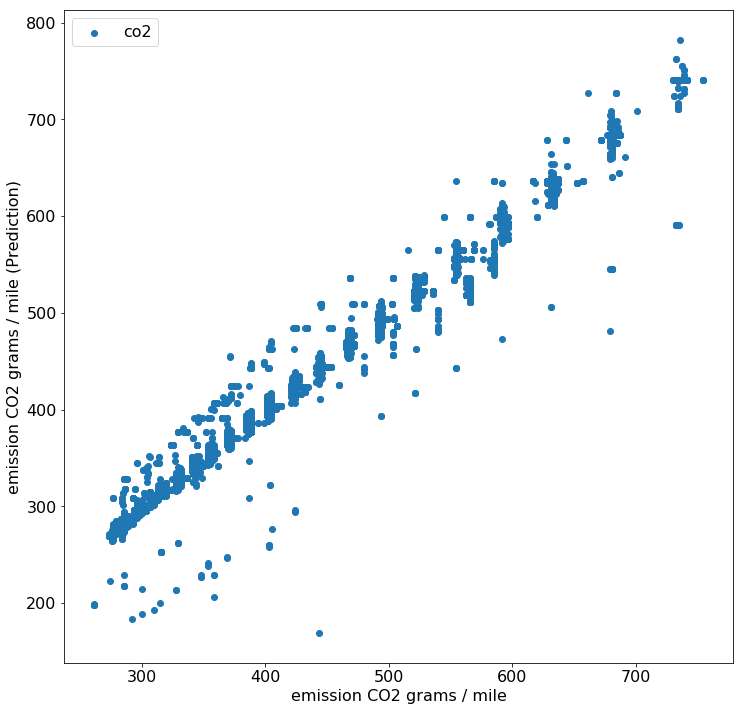

In [47]:
plt.scatter(y_pred,y_data)
plt.xlabel("emission CO2 grams / mile")
plt.ylabel("emission CO2 grams / mile (Prediction)")
plt.legend();